# Students early attrition - Capstone Project

## Importing libraries

In [1]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Dhivya\\Desktop\\Jigsaw FSDS\\Capstone project\\Python'

## Reading dataset and Understanding the data

In [3]:
# Reading dataset

att=pd.read_excel('Student Applications & Performance.xlsx')

In [4]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
STUDENT IDENTIFIER          3400 non-null int64
STDNT_AGE                   3400 non-null int64
STDNT_GENDER                3400 non-null object
STDNT_BACKGROUND            3400 non-null object
IN_STATE_FLAG               3400 non-null object
INTERNATIONAL_STS           3400 non-null object
STDNT_MAJOR                 3400 non-null object
STDNT_MINOR                 3400 non-null object
STDNT_TEST_ENTRANCE1        1106 non-null float64
STDNT_TEST_ENTRANCE2        2492 non-null float64
STDNT_TEST_ENTRANCE_COMB    2882 non-null float64
FIRST_TERM                  3400 non-null int64
CORE_COURSE_NAME_1_F        3400 non-null object
CORE_COURSE_GRADE_1_F       3400 non-null object
CORE_COURSE_NAME_2_F        3301 non-null object
CORE_COURSE_GRADE_2_F       3301 non-null object
CORE_COURSE_NAME_3_F        2835 non-null object
CORE_COURSE_GRADE_3_F       2835 non-null object
CORE_COURSE

In [5]:
att.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


## Missing values treatment

In [6]:
# Missing values percentage

round((att.isnull().sum()/att.shape[0])*100,2)

STUDENT IDENTIFIER           0.00
STDNT_AGE                    0.00
STDNT_GENDER                 0.00
STDNT_BACKGROUND             0.00
IN_STATE_FLAG                0.00
INTERNATIONAL_STS            0.00
STDNT_MAJOR                  0.00
STDNT_MINOR                  0.00
STDNT_TEST_ENTRANCE1        67.47
STDNT_TEST_ENTRANCE2        26.71
STDNT_TEST_ENTRANCE_COMB    15.24
FIRST_TERM                   0.00
CORE_COURSE_NAME_1_F         0.00
CORE_COURSE_GRADE_1_F        0.00
CORE_COURSE_NAME_2_F         2.91
CORE_COURSE_GRADE_2_F        2.91
CORE_COURSE_NAME_3_F        16.62
CORE_COURSE_GRADE_3_F       16.62
CORE_COURSE_NAME_4_F        46.97
CORE_COURSE_GRADE_4_F       46.97
CORE_COURSE_NAME_5_F        81.03
CORE_COURSE_GRADE_5_F       81.03
CORE_COURSE_NAME_6_F        96.24
CORE_COURSE_GRADE_6_F       96.24
SECOND_TERM                  0.00
CORE_COURSE_NAME_1_S         4.62
CORE_COURSE_GRADE_1_S        6.82
CORE_COURSE_NAME_2_S        12.91
CORE_COURSE_GRADE_2_S       12.91
CORE_COURSE_NA

In [7]:
#Dropping Columns with more than 20% missing values

names=att.columns.tolist()

for i in range(len(names)):
    if ((att[names[i]].isnull().sum()/att.shape[0])*100)>20:
        att=att.drop(names[i],axis=1)

In [8]:
print(att.shape)
att.head()

(3400, 40)


,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.0,200708,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,1190.0,200808,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1030.0,201008,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1220.0,200708,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,1190.0,200808,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


## Data Analysis

### Demographic data

In [9]:
att.columns.tolist()

['STUDENT IDENTIFIER',
 'STDNT_AGE',
 'STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'STDNT_TEST_ENTRANCE_COMB',
 'FIRST_TERM',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'SECOND_TERM',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S',
 'HOUSING_STS',
 'RETURNED_2ND_YR',
 'DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'HIGH_SCHL_NAME',
 'FATHER_HI_EDU_CD',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_CD',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED']

Reversing RETURNED_2ND_YR variable to get the reqd dependent variable

In [10]:
att['STDNT_LEFT']=np.where(att['RETURNED_2ND_YR']==1,0,1)

In [11]:
att=att.drop('RETURNED_2ND_YR',axis=1)

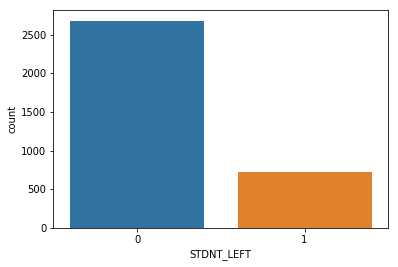

In [12]:
sns.countplot(x='STDNT_LEFT',data=att)
plt.savefig('Attrition counts.jpeg')

In [13]:
print('Number of students attrited is '+ str(att[att['STDNT_LEFT']==1].shape[0]))
print('Number of students not attrited is '+ str(att[att['STDNT_LEFT']==0].shape[0]))

print('Percentage of attrition is '+ str((round(((len(att[att['STDNT_LEFT']==1])/att.shape[0])*100),2))) + '%')
print('Percentage of no attrition is '+ str((round(((len(att[att['STDNT_LEFT']==0])/att.shape[0])*100),2))) + '%')

Number of students attrited is 723
Number of students not attrited is 2677
Percentage of attrition is 21.26%
Percentage of no attrition is 78.74%


In [14]:
att['STDNT_AGE']=att['STDNT_AGE'].replace({16:'16to18',17:'16to18',18:'16to18'})
att['STDNT_AGE']=att['STDNT_AGE'].replace({19:'19to21',20:'19to21',21:'19to21'})
att['STDNT_AGE']=att['STDNT_AGE'].replace({22:'22to26',23:'22to26',24:'22to26',25:'22to26',26:'22to26'})
att.STDNT_AGE.unique()

array(['16to18', '19to21', '22to26'], dtype=object)

In [15]:
AGE1=att.groupby(['STDNT_AGE','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
AGE2=att.groupby('STDNT_AGE',as_index=False)['STUDENT IDENTIFIER'].agg('count')
AGE=pd.merge(AGE1,AGE2,how='outer',on='STDNT_AGE')
AGE=AGE.query("STDNT_LEFT==1")
AGE['Attrition Percentage']=round((AGE['STUDENT IDENTIFIER_x']/AGE['STUDENT IDENTIFIER_y'])*100,0)
AGE.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(AGE.index)): ind=ind+[i] 
AGE.index=ind
AGE.sort_values('Attrition Percentage')

,STDNT_AGE,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
2,22to26,1,2,12,17.0
0,16to18,1,660,3177,21.0
1,19to21,1,61,211,29.0


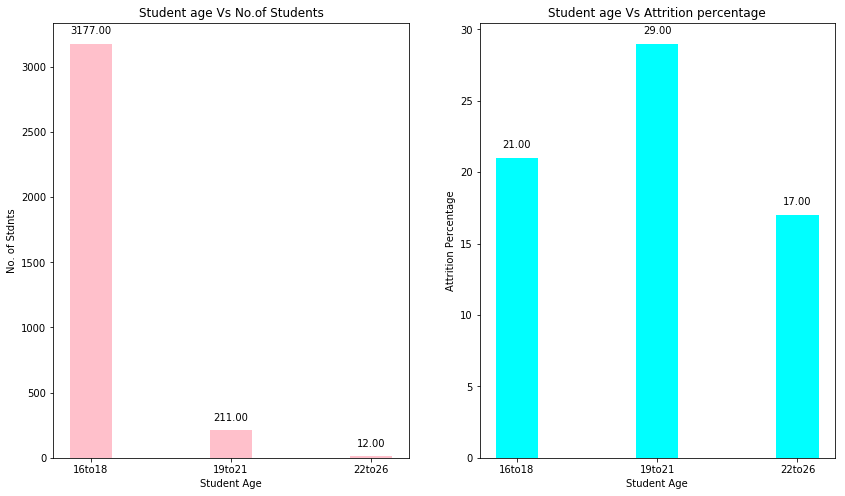

In [16]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1, 2, 1) 

plt.bar(AGE['STDNT_AGE'],AGE['Total no. of students'],width=0.3,color='pink')
plt.title('Student age Vs No.of Students')
plt.xlabel('Student Age')
plt.ylabel('No. of Stdnts')

for x,y in zip(AGE['STDNT_AGE'],AGE['Total no. of students']):

    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center') 

plt.subplot(1, 2, 2)

plt.bar(AGE['STDNT_AGE'],AGE['Attrition Percentage'],width=0.3,color='cyan')
plt.title('Student age Vs Attrition percentage')
plt.xlabel('Student Age')
plt.ylabel('Attrition Percentage')

for x,y in zip(AGE['STDNT_AGE'],AGE['Attrition Percentage']):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.show()
f.savefig('Age Vs Attrition.jpeg')

From the above charts, it is seen that most of the students' age are from 16 to 18 and attrition rate is high for students in the higher age range.

In [17]:
GENDER1=att.groupby(['STDNT_GENDER','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
GENDER2=att.groupby('STDNT_GENDER',as_index=False)['STUDENT IDENTIFIER'].agg('count')
GENDER=pd.merge(GENDER1,GENDER2,how='outer',on='STDNT_GENDER')
GENDER=GENDER.query("STDNT_LEFT==1")
GENDER['Attrition Percentage']=round((GENDER['STUDENT IDENTIFIER_x']/GENDER['STUDENT IDENTIFIER_y'])*100,0)
GENDER.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(GENDER.index)): ind=ind+[i] 
GENDER.index=ind
GENDER.sort_values('Attrition Percentage')

,STDNT_GENDER,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
1,M,1,248,1260,20.0
0,F,1,475,2140,22.0


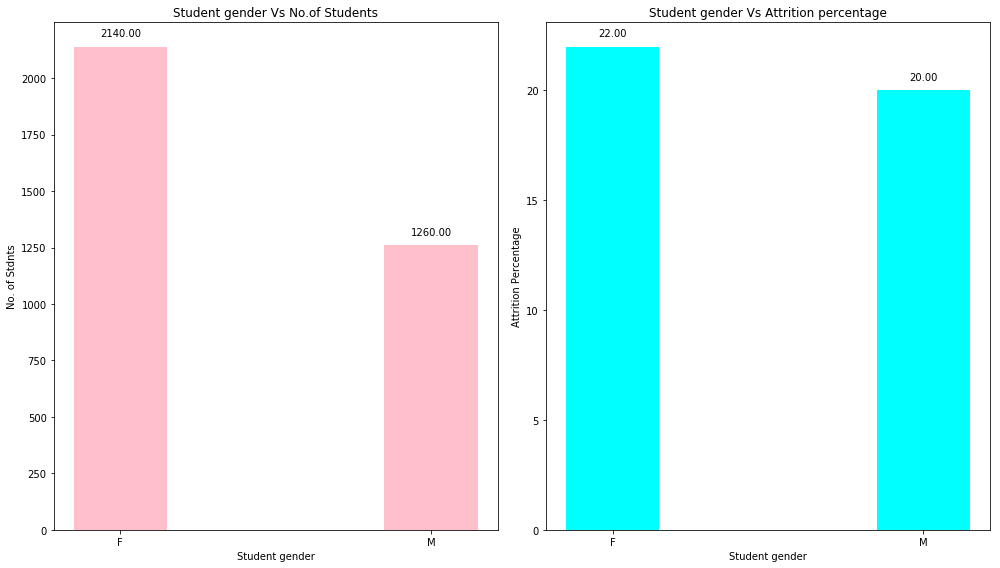

In [18]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1, 2, 1) 

plt.bar(GENDER['STDNT_GENDER'],GENDER['Total no. of students'],width=0.3,color='pink')
plt.title('Student gender Vs No.of Students')
plt.xlabel('Student gender')
plt.ylabel('No. of Stdnts')

for x,y in zip(GENDER['STDNT_GENDER'],GENDER['Total no. of students']):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.subplot(1, 2, 2)

plt.bar(GENDER['STDNT_GENDER'],GENDER['Attrition Percentage'],width=0.3,color='cyan')
plt.title('Student gender Vs Attrition percentage')
plt.xlabel('Student gender')
plt.ylabel('Attrition Percentage')

for x,y in zip(GENDER['STDNT_GENDER'],GENDER['Attrition Percentage']):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.tight_layout()
plt.show()

f.savefig('Gender Vs Attrition.jpeg')

Female students are more in number and their attrition rate is also slightly more than the male students

In [19]:
tab1=pd.crosstab([att.STDNT_AGE,att.STDNT_GENDER],att.STDNT_LEFT)
tab1=DataFrame(tab1)
tab1

STDNT_LEFT                 0    1
STDNT_AGE STDNT_GENDER           
16to18    F             1597  444
          M              920  216
19to21    F               66   30
          M               84   31
22to26    F                2    1
          M                8    1

In [20]:
tab1.index

MultiIndex(levels=[['16to18', '19to21', '22to26'], ['F', 'M']],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['STDNT_AGE', 'STDNT_GENDER'])

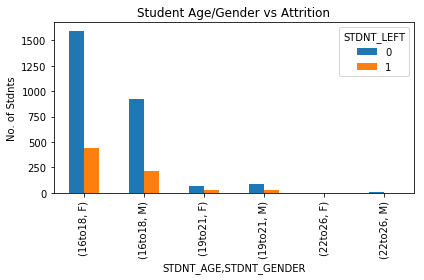

In [21]:
tab1.plot(kind='bar')
plt.title('Student Age/Gender vs Attrition')
plt.ylabel('No. of Stdnts')
plt.tight_layout()
plt.savefig('Student Age&Gender vs Attrition.jpeg')

From the above chart, it is seen that female students in the age range of 16 to 18 are having more number of attrition.

In [22]:
BGD1=att.groupby(['STDNT_BACKGROUND','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
BGD2=att.groupby('STDNT_BACKGROUND',as_index=False)['STUDENT IDENTIFIER'].agg('count')
BGD=pd.merge(BGD1,BGD2,how='outer',on='STDNT_BACKGROUND')
BGD=BGD.query("STDNT_LEFT==1")
BGD['Attrition Percentage']=round((BGD['STUDENT IDENTIFIER_x']/BGD['STUDENT IDENTIFIER_y'])*100,0)
BGD.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(0,8): ind=ind+[i] 
BGD.index=ind
BGD.sort_values('Attrition Percentage')

,STDNT_BACKGROUND,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
5,BGD 6,1,14,94,15.0
2,BGD 3,1,170,947,18.0
3,BGD 4,1,26,139,19.0
7,BGD 8,1,1,5,20.0
0,BGD 1,1,477,2082,23.0
1,BGD 2,1,24,106,23.0
6,BGD 7,1,7,19,37.0
4,BGD 5,1,4,8,50.0


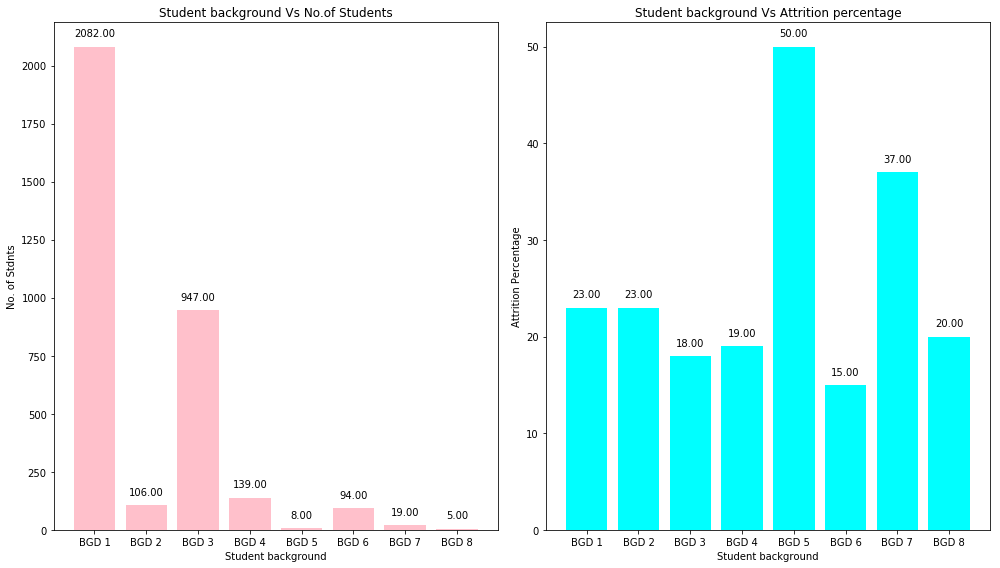

In [23]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1,2, 1) 

plt.bar(BGD['STDNT_BACKGROUND'],BGD['Total no. of students'],color='pink')
plt.title('Student background Vs No.of Students')
plt.xlabel('Student background')
plt.ylabel('No. of Stdnts')

for x,y in zip(BGD['STDNT_BACKGROUND'],BGD['Total no. of students']):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')


plt.subplot(1,2, 2)

plt.bar(BGD['STDNT_BACKGROUND'],BGD['Attrition Percentage'],color='cyan')
plt.title('Student background Vs Attrition percentage')
plt.xlabel('Student background')
plt.ylabel('Attrition Percentage')

for x,y in zip(BGD['STDNT_BACKGROUND'],BGD['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')



plt.tight_layout()
plt.show()
f.savefig('Background Vs Attrition.jpeg')

Most of the students are from Background 1 and 3. Students are very less in number for Backgrounds 5,7 and 8. The attrition rates are also high for BGD 5,7 & 8.

In [24]:
ISF1=att.groupby(['IN_STATE_FLAG','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
ISF2=att.groupby('IN_STATE_FLAG',as_index=False)['STUDENT IDENTIFIER'].agg('count')
ISF=pd.merge(ISF1,ISF2,how='outer',on='IN_STATE_FLAG')
ISF=ISF.query("STDNT_LEFT==1")
ISF['Attrition Percentage']=round((ISF['STUDENT IDENTIFIER_x']/ISF['STUDENT IDENTIFIER_y'])*100,0)
ISF.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(ISF.index)): ind=ind+[i] 
ISF.index=ind
ISF.sort_values('Attrition Percentage')

,IN_STATE_FLAG,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
1,Y,1,634,3063,21.0
0,N,1,89,337,26.0


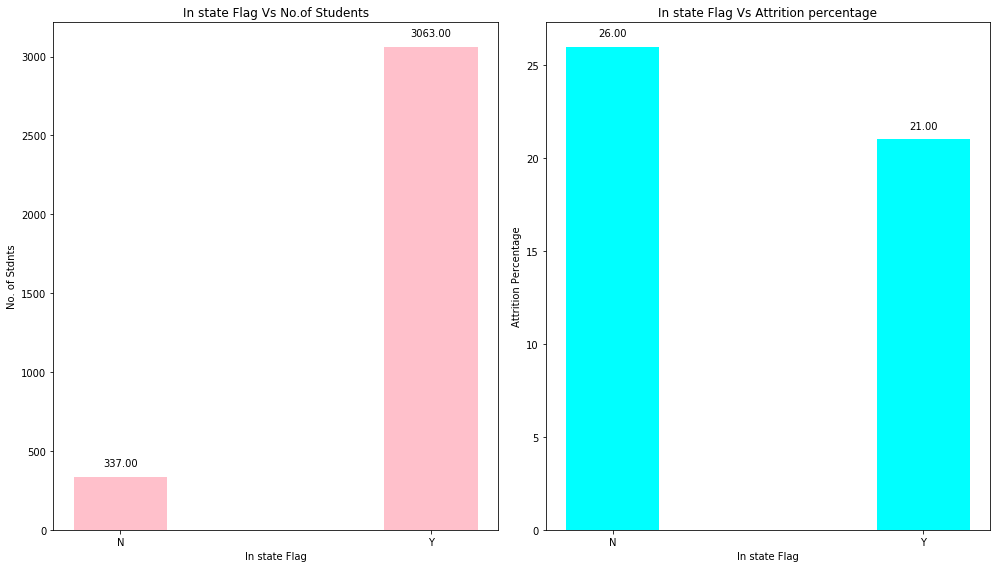

In [25]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1,2, 1) 

plt.bar(ISF['IN_STATE_FLAG'],ISF['Total no. of students'],width=0.3,color='pink')
plt.title('In state Flag Vs No.of Students')
plt.xlabel('In state Flag')
plt.ylabel('No. of Stdnts')

for x,y in zip(ISF['IN_STATE_FLAG'],ISF['Total no. of students']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.subplot(1,2, 2)

plt.bar(ISF['IN_STATE_FLAG'],ISF['Attrition Percentage'],width=0.3,color='cyan')
plt.title('In state Flag Vs Attrition percentage')
plt.xlabel('In state Flag')
plt.ylabel('Attrition Percentage')

for x,y in zip(ISF['IN_STATE_FLAG'],ISF['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
f.savefig('In state Flag Vs Attrition.jpeg')

Students from other states are very less while their attrition rate is high

In [26]:
INS1=att.groupby(['INTERNATIONAL_STS','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
INS2=att.groupby('INTERNATIONAL_STS',as_index=False)['STUDENT IDENTIFIER'].agg('count')
INS=pd.merge(INS1,INS2,how='outer',on='INTERNATIONAL_STS')
INS=INS.query("STDNT_LEFT==1")
INS['Attrition Percentage']=round((INS['STUDENT IDENTIFIER_x']/INS['STUDENT IDENTIFIER_y'])*100,0)
INS.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(INS.index)): ind=ind+[i] 
INS.index=ind
INS.sort_values('Attrition Percentage')

,INTERNATIONAL_STS,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
0,N,1,711,3373,21.0
1,Y,1,12,27,44.0


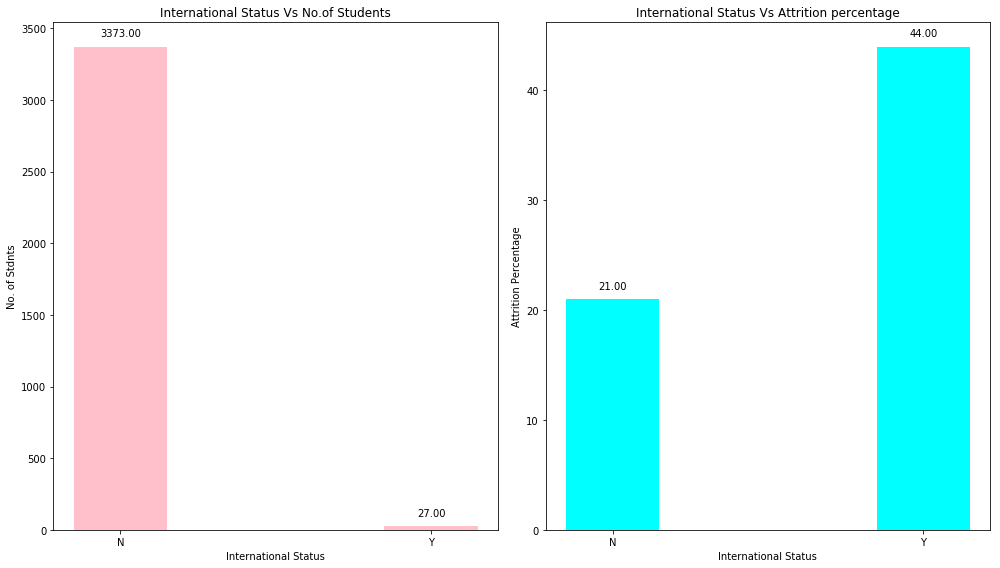

In [27]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1,2, 1) 

plt.bar(INS['INTERNATIONAL_STS'],INS['Total no. of students'],width=0.3,color='pink')
plt.title('International Status Vs No.of Students')
plt.xlabel('International Status')
plt.ylabel('No. of Stdnts')

for x,y in zip(INS['INTERNATIONAL_STS'],INS['Total no. of students']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.subplot(1,2, 2)

plt.bar(INS['INTERNATIONAL_STS'],INS['Attrition Percentage'],width=0.3,color='cyan')
plt.title('International Status Vs Attrition percentage')
plt.xlabel('International Status')
plt.ylabel('Attrition Percentage')

for x,y in zip(INS['INTERNATIONAL_STS'],INS['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
f.savefig('International Status Vs Attrition.jpeg')

The number of international students is very low and their attrition rate is high.

In [28]:
HS1=att.groupby(['HOUSING_STS','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
HS2=att.groupby('HOUSING_STS',as_index=False)['STUDENT IDENTIFIER'].agg('count')
HS=pd.merge(HS1,HS2,how='outer',on='HOUSING_STS')
HS=HS.query("STDNT_LEFT==1")
HS['Attrition Percentage']=round((HS['STUDENT IDENTIFIER_x']/HS['STUDENT IDENTIFIER_y'])*100,0)
HS.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(HS.index)): ind=ind+[i] 
HS.index=ind
HS.sort_values('Attrition Percentage')

,HOUSING_STS,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
0,Off Campus,1,389,1981,20.0
1,On Campus,1,334,1419,24.0


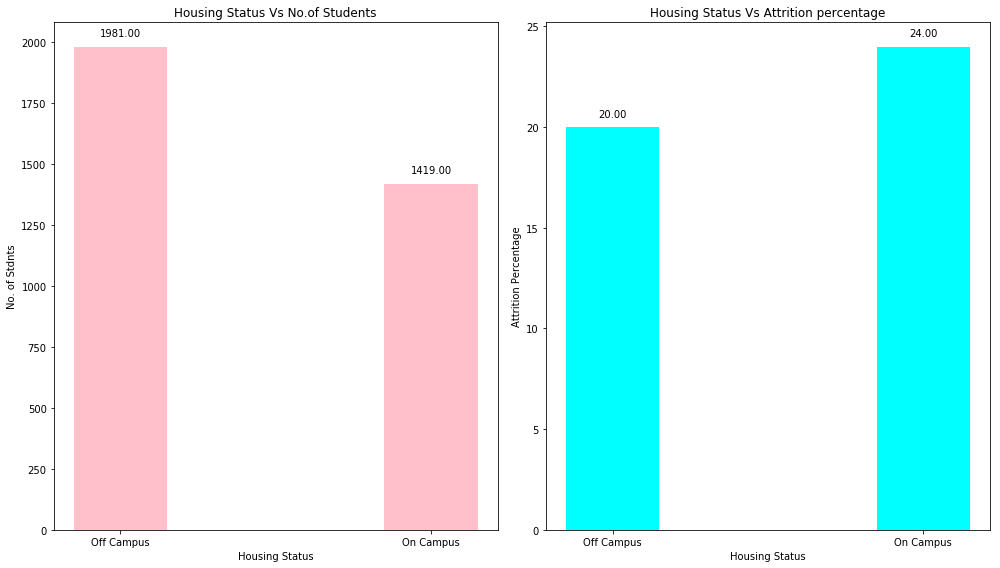

In [29]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1,2, 1) 

plt.bar(HS['HOUSING_STS'],HS['Total no. of students'],width=0.3,color='pink')
plt.title('Housing Status Vs No.of Students')
plt.xlabel('Housing Status')
plt.ylabel('No. of Stdnts')

for x,y in zip(HS['HOUSING_STS'],HS['Total no. of students']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.subplot(1,2, 2)

plt.bar(HS['HOUSING_STS'],HS['Attrition Percentage'],width=0.3,color='cyan')
plt.title('Housing Status Vs Attrition percentage')
plt.xlabel('Housing Status')
plt.ylabel('Attrition Percentage')

for x,y in zip(HS['HOUSING_STS'],HS['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
f.savefig('Housing Status Vs Attrition.jpeg')

The number of students living inside the campus is lower. Their attrtion rates seem to be slightly more than the students living off campus.

In [30]:
tab2=pd.crosstab([att.INTERNATIONAL_STS,att.IN_STATE_FLAG,att.HOUSING_STS],att.STDNT_LEFT)
tab2=DataFrame(tab2)
tab2

STDNT_LEFT                                      0    1
INTERNATIONAL_STS IN_STATE_FLAG HOUSING_STS           
N                 N             Off Campus    180   46
                                On Campus      53   31
                  Y             Off Campus   1406  338
                                On Campus    1023  296
Y                 N             Off Campus      6    5
                                On Campus       9    7

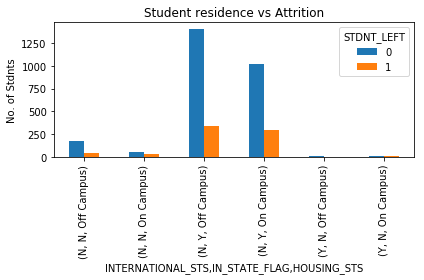

In [31]:
tab2.plot(kind='bar')
plt.title('Student residence vs Attrition')
plt.ylabel('No. of Stdnts')
plt.tight_layout()
plt.savefig('Student residence vs Attrition.jpeg')

Form the above chart, we can see that students from the same country and state as the university and living off campus are showing more attrition.

In [32]:
att['DISTANCE_FROM_HOME'].value_counts()

69.0      1402
0.0        671
150.0      497
90.0       248
138.0      227
59.0        53
188.0       24
181.0       24
190.0       22
235.0       20
91.0        18
176.0       15
137.0       14
215.0       13
136.0       12
117.0       11
222.0       10
237.0        9
666.0        6
208.0        5
275.0        4
299.0        4
246.0        4
5932.0       3
270.0        3
283.0        2
513.0        2
711.0        2
398.0        2
997.0        2
          ... 
1161.0       1
919.0        1
786.0        1
366.0        1
1216.0       1
2221.0       1
778.0        1
1222.0       1
1735.0       1
330.0        1
722.0        1
2203.0       1
421.0        1
225.0        1
477.0        1
574.0        1
528.0        1
1001.0       1
274.0        1
517.0        1
694.0        1
609.0        1
769.0        1
1270.0       1
441.0        1
316.0        1
151.0        1
403.0        1
572.0        1
1078.0       1
Name: DISTANCE_FROM_HOME, Length: 71, dtype: int64

In [33]:
att.DISTANCE_FROM_HOME.quantile(0.90)

150.0

Most of the students live near to the university. Many of the disances are 0. This variable does not seem to give much useful information regarding attrtition. S, dropping this column.

In [34]:
att=att.drop('DISTANCE_FROM_HOME',axis=1)

### Performance Data

In [35]:
att.columns

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'HOUSING_STS', 'HIGH_SCHL_GPA',
       'HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD', 'FATHER_HI_EDU_DESC',
       'MOTHER_HI_EDU_CD', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_CD',
       'DEGREE_GROUP_DESC', 'FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS',
       'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS', 'GROSS_FIN_NEED',
       'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'STDNT_LEFT'],
      dtype='object')

In [36]:
[att['STDNT_MAJOR'].value_counts().sort_values(ascending=False).index]


[Index(['Undeclared', 'Biology', 'Early Childhood Education', 'Pre-Nursing',
        'Nursing', 'Psychology', 'Pre-Business', 'Theatre Arts',
        'Music Performance', 'Criminal Justice', 'Music Education',
        'General Business', 'Exercise Science', 'Art', 'Management',
        'Communication', 'Chemistry', 'Political Science',
        'English Language/Literature', 'Engineering Studies', 'Marketing',
        'Computer Science - Systems', 'Accounting', 'Health Science',
        'Computer Science - Games', 'Joint Enrollment - Accel', 'History',
        'Applied Computer Science', 'Theatre Education',
        'English and Secondary Ed', 'History and Secondary Ed',
        'Pre-Engineering/RETP', 'Mathematics', 'Finance',
        'Management Information Systems', 'Health and Physical Education',
        'Sociology', 'Music', 'Middle Grades Education',
        'Spec Ed: Gen. Curr. - Reading', 'General Studies/AS',
        'Mathematics and Secondary Ed', 'Information Technology',
  

This variable has many levels. Hence keeping only the levels with most number of students and renamnig the other levels to 'others'.

In [37]:
list=['General Business', 'Exercise Science', 'Art', 'Management',
        'Communication', 'Chemistry', 'Political Science',
        'Engineering Studies', 'English Language/Literature', 'Marketing',
        'Computer Science - Systems', 'Accounting', 'Health Science',
        'Computer Science - Games', 'Joint Enrollment - Accel', 'History',
        'Applied Computer Science', 'Theatre Education',
        'English and Secondary Ed', 'History and Secondary Ed',
        'Pre-Engineering/RETP', 'Mathematics', 'Finance',
        'Management Information Systems', 'Sociology',
        'Health and Physical Education', 'Middle Grades Education', 'Music',
        'Spec Ed: Gen. Curr. - Reading', 'General Studies/AS',
        'Mathematics and Secondary Ed', 'Information Technology',
        'Art Education', 'Spanish', 'Biology and Secondary Ed',
        'French with Teacher Cert', 'Geology', 'Spanish with Teacher Cert',
        'French', 'Early Admission - Accel', 'Earth and Space Science',
        'Chemistry and Secondary Ed', 'Liberal Arts','Undeclared']
att['STDNT_MAJOR'].replace(list,'Others',inplace=True)

In [38]:
att['STDNT_MAJOR'].unique()

array(['Others', 'Biology', 'Criminal Justice', 'Psychology',
       'Theatre Arts', 'Nursing', 'Pre-Nursing',
       'Early Childhood Education', 'Music Performance', 'Pre-Business',
       'Music Education'], dtype=object)

In [39]:
MJR1=att.groupby(['STDNT_MAJOR','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
MJR2=att.groupby('STDNT_MAJOR',as_index=False)['STUDENT IDENTIFIER'].agg('count')
MJR=pd.merge(MJR1,MJR2,how='outer',on='STDNT_MAJOR')
MJR=MJR.query("STDNT_LEFT==1")
MJR['Attrition Percentage']=round((MJR['STUDENT IDENTIFIER_x']/MJR['STUDENT IDENTIFIER_y'])*100,0)
MJR.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(MJR.index)): ind=ind+[i] 
MJR.index=ind
MJR.sort_values('Attrition Percentage')

,STDNT_MAJOR,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
3,Music Education,1,8,96,8.0
10,Theatre Arts,1,12,131,9.0
4,Music Performance,1,12,99,12.0
2,Early Childhood Education,1,37,190,19.0
6,Others,1,384,1795,21.0
0,Biology,1,82,362,23.0
5,Nursing,1,37,164,23.0
7,Pre-Business,1,32,133,24.0
8,Pre-Nursing,1,47,177,27.0
9,Psychology,1,43,155,28.0


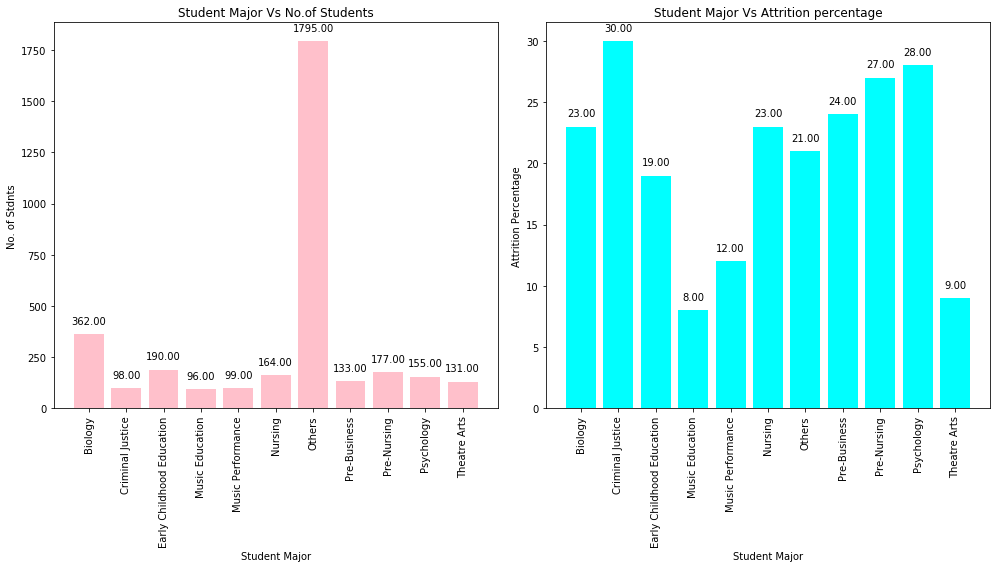

In [40]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1,2, 1) 

plt.bar(MJR['STDNT_MAJOR'],MJR['Total no. of students'],color='pink')
plt.title('Student Major Vs No.of Students')
plt.xlabel('Student Major')
plt.ylabel('No. of Stdnts')
plt.xticks(rotation=90)

for x,y in zip(MJR['STDNT_MAJOR'],MJR['Total no. of students']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.subplot(1,2, 2)

plt.bar(MJR['STDNT_MAJOR'],MJR['Attrition Percentage'],color='cyan')
plt.title('Student Major Vs Attrition percentage')
plt.xlabel('Student Major')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=90)

for x,y in zip(MJR['STDNT_MAJOR'],MJR['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')


plt.tight_layout()
plt.show()
f.savefig('Student Major Vs Attrition.jpeg')

Leaving 'others', the number of students with BIOLOGY as their major is more. The attrition rate is in the range of 20 to 30% for most of the courses(which seems very high), with 'CRIMINAL JUSTICE' having the highest attrition rate.

In [41]:
att['STDNT_MINOR'].value_counts().sort_values(ascending=False)

N                                3160
Spanish                            26
Psychology                         19
Music                              19
Foundations of Business            15
Communication                      14
History                            13
Theatre Arts                       12
Criminal Justice                   12
Computer Science - Systems         10
Early Childhood Education           9
Mathematics                         7
Marketing                           6
Professional Writing                6
Art History                         6
Sociology                           5
Art                                 5
English Language/Literature         5
Chemistry                           4
Political Science                   4
Accounting                          4
Biology                             4
French                              4
Exercise Science                    3
Computer Info. Management           3
Economics                           3
Internationa

Almost 93% of the students have 'N' as their minor subject. Assuming this as No minor subject, we are dropping this column.

In [42]:
att=att.drop('STDNT_MINOR',axis=1)

In [43]:
att['STDNT_TEST_ENTRANCE_COMB'].isnull().sum()

518

In [44]:
att['STDNT_TEST_ENTRANCE_COMB'].describe()

count    2882.000000
mean      997.758501
std       156.268221
min       530.000000
25%       910.000000
50%       990.000000
75%      1110.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [45]:
att['STDNT_TEST_ENTRANCE_COMB']=att['STDNT_TEST_ENTRANCE_COMB'].fillna(990.0)

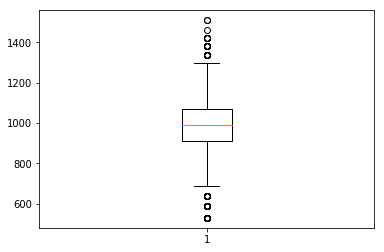

In [46]:
bp=plt.boxplot(att['STDNT_TEST_ENTRANCE_COMB'])

In [47]:
a=bp['fliers'][0]
out=a.get_data()[1]
out

array([ 590.,  590.,  590.,  640.,  530.,  640.,  590.,  590.,  640.,
        590.,  530.,  640.,  590.,  590.,  590.,  590.,  590.,  590.,
        590.,  530.,  530.,  640.,  640.,  640.,  590.,  640.,  590.,
        530.,  590.,  590.,  530.,  590.,  590.,  590.,  530.,  590.,
        530.,  640.,  530.,  530.,  640.,  590.,  530.,  590.,  530.,
        530.,  590.,  590.,  640.,  530.,  530.,  640.,  590.,  530.,
        590.,  590.,  530.,  530.,  640.,  590.,  530.,  640.,  590.,
        590.,  530.,  590.,  590.,  590.,  530.,  530.,  640.,  640.,
        530.,  530.,  530.,  590.,  590.,  640.,  530.,  590.,  530.,
        530.,  530.,  530.,  530.,  530.,  530.,  530.,  590.,  530.,
        530.,  640.,  590.,  530.,  530.,  530.,  590.,  640.,  530.,
        530.,  530.,  530.,  590.,  590.,  530.,  530.,  590.,  530.,
        640.,  640.,  530.,  640.,  590.,  590.,  530.,  530.,  640.,
        590.,  530.,  530.,  590.,  590., 1340., 1340., 1380., 1380.,
       1340., 1380.,

In [48]:
att['STDNT_TEST_ENTRANCE_COMB'].replace(out,att['STDNT_TEST_ENTRANCE_COMB'].mean(),inplace=True)

In [49]:
att['STDNT_TEST_ENTRANCE_COMB'].describe()

count    3400.000000
mean     1006.402353
std       110.067681
min       690.000000
25%       950.000000
50%       990.000000
75%      1070.000000
max      1300.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [50]:
att['STDNT_TEST_ENTRANCE_COMB'].unique()

array([1150.        , 1190.        , 1030.        , 1220.        ,
       1070.        ,  996.57647059,  740.        ,  990.        ,
       1260.        , 1110.        ,  910.        , 1300.        ,
        950.        ,  690.        ,  870.        ,  790.        ,
        830.        ])

In [51]:
ETC1=att.groupby(['STDNT_TEST_ENTRANCE_COMB','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
ETC2=att.groupby('STDNT_TEST_ENTRANCE_COMB',as_index=False)['STUDENT IDENTIFIER'].agg('count')
ETC=pd.merge(ETC1,ETC2,how='outer',on='STDNT_TEST_ENTRANCE_COMB')
ETC=ETC.query("STDNT_LEFT==1")
ETC['Attrition Percentage']=round((ETC['STUDENT IDENTIFIER_x']/ETC['STUDENT IDENTIFIER_y'])*100,0)
ETC.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(ETC.index)): ind=ind+[i] 
ETC.index=ind
ETC.sort_values('Attrition Percentage')

,STDNT_TEST_ENTRANCE_COMB,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
1,740.000000,1,2,25,8.0
2,790.000000,1,5,48,10.0
15,1260.000000,1,10,68,15.0
8,996.576471,1,27,170,16.0
14,1220.000000,1,18,107,17.0
16,1300.000000,1,6,35,17.0
10,1070.000000,1,46,234,20.0
13,1190.000000,1,29,139,21.0
5,910.000000,1,65,309,21.0
7,990.000000,1,191,870,22.0


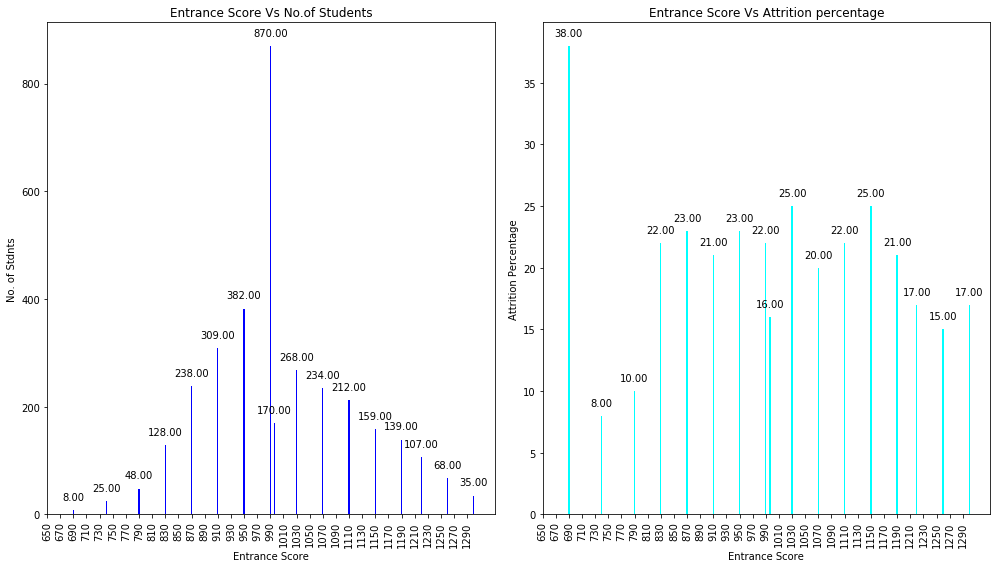

In [52]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1,2, 1) 

plt.bar(ETC['STDNT_TEST_ENTRANCE_COMB'],ETC['Total no. of students'],width=2,color='blue')
plt.title('Entrance Score Vs No.of Students')
plt.xlabel('Entrance Score')
plt.ylabel('No. of Stdnts')
plt.xticks(range(650,1310,20),rotation=90)

for x,y in zip(ETC['STDNT_TEST_ENTRANCE_COMB'],ETC['Total no. of students']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.subplot(1,2, 2)

plt.bar(ETC['STDNT_TEST_ENTRANCE_COMB'],ETC['Attrition Percentage'],width=2,color='cyan')
plt.title('Entrance Score Vs Attrition percentage')
plt.xlabel('Entrance Score')
plt.ylabel('Attrition Percentage')
plt.xticks(range(650,1310,20),rotation=90)

for x,y in zip(ETC['STDNT_TEST_ENTRANCE_COMB'],ETC['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
f.savefig('Entrance Score Vs Attrition.jpeg')

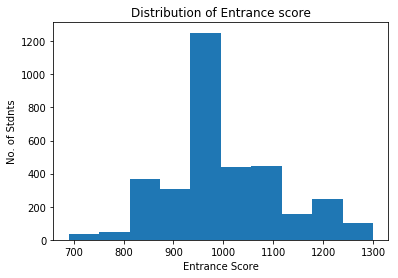

In [53]:
plt.hist(att.STDNT_TEST_ENTRANCE_COMB)
plt.title('Distribution of Entrance score')
plt.xlabel('Entrance Score')
plt.ylabel('No. of Stdnts')
plt.savefig('Entrance Score - Histogram.jpeg')

From the above charts, we can see that most of the student are in the medium range of entrance test marks. The attrition rate ranges from 15% to 25% for most of the scores.

Dropping the variables ('FIRST_TERM','CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S','CORE_COURSE_GRADE_2_S'). These variables have many levels and the grades of the students can be got from the variables FIRST_TERM_EARNED_HOURS and SECOND_TERM_EARNED_HOURS. 

In [54]:
att=att.drop(['FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S'],axis=1)

In [55]:
att.HIGH_SCHL_GPA.describe()

count    3347.000000
mean        3.202738
std         0.455337
min         0.000000
25%         2.870000
50%         3.200000
75%         3.560000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [56]:
# Imputing missing values with mean
att.HIGH_SCHL_GPA=att.HIGH_SCHL_GPA.fillna(3.2)

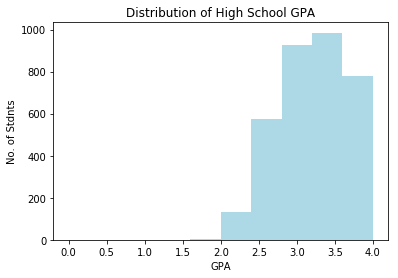

In [57]:
plt.hist(att.HIGH_SCHL_GPA,color='lightblue')
plt.title('Distribution of High School GPA')
plt.xlabel('GPA')
plt.ylabel('No. of Stdnts')
plt.savefig('High School GPA - Histogram.jpeg')

Most of the students have 3 to 4 as their high school GPA.

Dropping variables ('HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','DEGREE_GROUP_CD'). 
'HIGH_SCHL_NAME' - does not provide useful information regarding attrition.
'FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','DEGREE_GROUP_CD' - these are only codes for the variables which give their description respectively.

In [58]:
att=att.drop(['HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','DEGREE_GROUP_CD'],axis=1)

#### Creating Derived variables 'FIRST_TERM_PERFORMANCE' and 'SECOND_TERM_PERFORMANCE'

FIRST_TERM_PERFORMANCE

In [59]:
print(sorted(att.FIRST_TERM_ATTEMPT_HRS.unique()))
print(sorted(att.FIRST_TERM_EARNED_HRS.unique()))

att['FIRST_TERM_PERFORMANCE']=att.FIRST_TERM_EARNED_HRS/att.FIRST_TERM_ATTEMPT_HRS

print(sorted(att.FIRST_TERM_PERFORMANCE.unique()))

[9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0.0, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.13333333333333333, 0.14285714285714285, 0.16666666666666666, 0.17647058823529413, 0.1875, 0.2, 0.21428571428571427, 0.23076923076923078, 0.25, 0.26666666666666666, 0.2857142857142857, 0.3076923076923077, 0.3333333333333333, 0.35294117647058826, 0.35714285714285715, 0.375, 0.38461538461538464, 0.3888888888888889, 0.4, 0.4117647058823529, 0.4166666666666667, 0.42857142857142855, 0.4375, 0.4444444444444444, 0.46153846153846156, 0.4666666666666667, 0.5, 0.5294117647058824, 0.5333333333333333, 0.5384615384615384, 0.5625, 0.5714285714285714, 0.5833333333333334, 0.5882352941176471, 0.6, 0.6111111111111112, 0.6153846153846154, 0.625, 0.6428571428571429, 0.6666666666666666, 0.6875, 0.6923076923076923, 0.7058823529411765, 0.7142857142857143, 0.7222222222222222, 0.7333333333333333,

Deleting rows with FIRST_TERM_PERFORMANCE above 1 as it is not possible to earn hours more than that attempted for.

In [60]:
print(att.query("FIRST_TERM_PERFORMANCE==1.2307692307692308").index)
print(att.query("FIRST_TERM_PERFORMANCE==1.2727272727272727").index)
print(att.query("FIRST_TERM_PERFORMANCE==1.3333333333333333").index)

Int64Index([906, 2262], dtype='int64')
Int64Index([3342], dtype='int64')
Int64Index([998], dtype='int64')


In [61]:
att=att.drop([998,3342,906,2262],axis=0)

SECOND_TERM_PERFORMANCE

In [62]:
print(sorted(att.SECOND_TERM_ATTEMPT_HRS.unique()))
print(sorted(att.SECOND_TERM_EARNED_HRS.unique()))

att['SECOND_TERM_PERFORMANCE']=att.SECOND_TERM_EARNED_HRS/att.SECOND_TERM_ATTEMPT_HRS

print(sorted(att.SECOND_TERM_PERFORMANCE.unique()))

[2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, nan]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, nan]
[0.23076923076923078, 0.35714285714285715, 0.46153846153846156, 0.47368421052631576, 0.5, 0.5294117647058824, 0.5333333333333333, 0.5384615384615384, 0.5555555555555556, 0.5625, 0.5882352941176471, 0.6, 0.631578947368421, 0.6470588235294118, 0.6666666666666666, 0.6875, 0.6923076923076923, 0.7, 0.7058823529411765, 0.7142857142857143, 0.7222222222222222, 0.7333333333333333, 0.75, 0.7647058823529411, 0.7692307692307693, 0.7777777777777778, 0.7857142857142857, 0.7894736842105263, 0.8, 0.8125, 0.8181818181818182, 0.8235294117647058, 0.8333333333333334, 0.8571428571428571, 0.8666666666666667, 0.8823529411764706, 0.8947368421052632, 0.9230769230769231, 0.9285714285714286, 0.9333333333333333, 0.9375, 0.9411764705882353, 0.9444444444444444,

In [63]:
# Imputing missing values with mean
print(att.SECOND_TERM_PERFORMANCE.isnull().sum())
att.SECOND_TERM_PERFORMANCE=att.SECOND_TERM_PERFORMANCE.fillna(att.SECOND_TERM_PERFORMANCE.mean())

208


In [64]:
att=att.drop(['FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS',
       'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS'],axis=1)

### Financial data

In [65]:
att.columns

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR',
       'STDNT_TEST_ENTRANCE_COMB', 'HOUSING_STS', 'HIGH_SCHL_GPA',
       'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_DESC',
       'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION',
       'UNMET_NEED', 'STDNT_LEFT', 'FIRST_TERM_PERFORMANCE',
       'SECOND_TERM_PERFORMANCE'],
      dtype='object')

In [66]:
FED1=att.groupby(['FATHER_HI_EDU_DESC','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
FED2=att.groupby('FATHER_HI_EDU_DESC',as_index=False)['STUDENT IDENTIFIER'].agg('count')
FED=pd.merge(FED1,FED2,how='outer',on='FATHER_HI_EDU_DESC')
FED=FED.query("STDNT_LEFT==1")
FED['Attrition Percentage']=round((FED['STUDENT IDENTIFIER_x']/FED['STUDENT IDENTIFIER_y'])*100,0)
FED.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(FED.index)): ind=ind+[i] 
FED.index=ind
FED.sort_values('Attrition Percentage')

,FATHER_HI_EDU_DESC,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
0,College/Beyond,1,256,1307,20.0
4,Other/Unknown,1,48,226,21.0
1,High School,1,288,1334,22.0
3,No Information,1,103,432,24.0
2,Middle School/Junior High,1,26,97,27.0


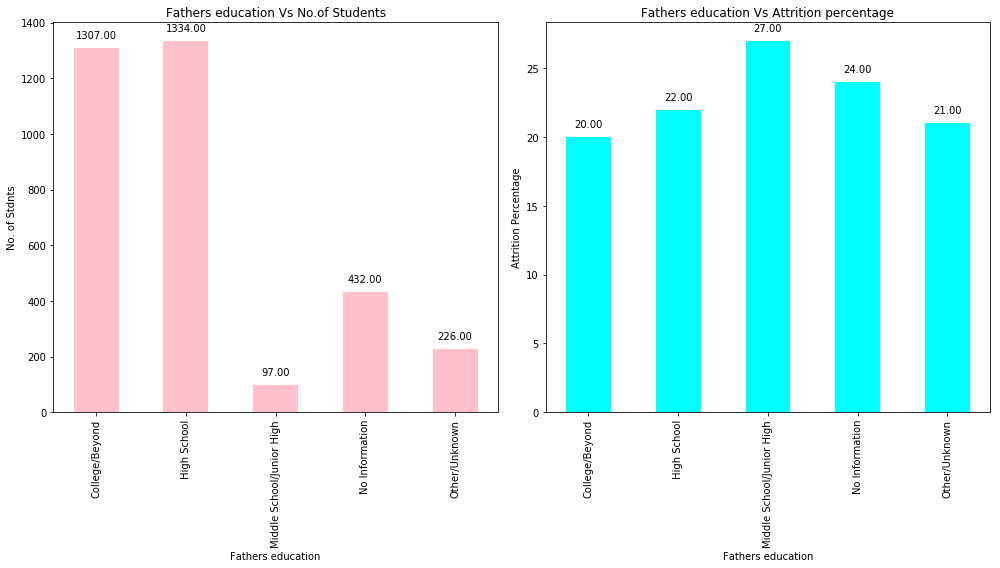

In [67]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1,2, 1) 

plt.bar(FED['FATHER_HI_EDU_DESC'],FED['Total no. of students'],width=0.5,color='pink')
plt.title('Fathers education Vs No.of Students')
plt.xlabel('Fathers education')
plt.ylabel('No. of Stdnts')
plt.xticks(rotation=90)

for x,y in zip(FED['FATHER_HI_EDU_DESC'],FED['Total no. of students']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.subplot(1,2, 2)

plt.bar(FED['FATHER_HI_EDU_DESC'],FED['Attrition Percentage'],width=0.5,color='cyan')
plt.title('Fathers education Vs Attrition percentage')
plt.xlabel('Fathers education')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=90)

for x,y in zip(FED['FATHER_HI_EDU_DESC'],FED['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
f.savefig('Fathers education Vs Attrition.jpeg')

Most of the students' fathers have education above high school level. The attrition rates for students of fathers whose education is below high school level are more than the other students.

In [68]:
MED1=att.groupby(['MOTHER_HI_EDU_DESC','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
MED2=att.groupby('MOTHER_HI_EDU_DESC',as_index=False)['STUDENT IDENTIFIER'].agg('count')
MED=pd.merge(MED1,MED2,how='outer',on='MOTHER_HI_EDU_DESC')
MED=MED.query("STDNT_LEFT==1")
MED['Attrition Percentage']=round((MED['STUDENT IDENTIFIER_x']/MED['STUDENT IDENTIFIER_y'])*100,0)
MED.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(FED.index)): ind=ind+[i] 
MED.index=ind
MED.sort_values('Attrition Percentage')

,MOTHER_HI_EDU_DESC,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
4,Other/Unknown,1,18,117,15.0
0,College/Beyond,1,299,1496,20.0
1,High School,1,265,1223,22.0
2,Middle School/Junior High,1,16,71,23.0
3,No Information,1,123,489,25.0


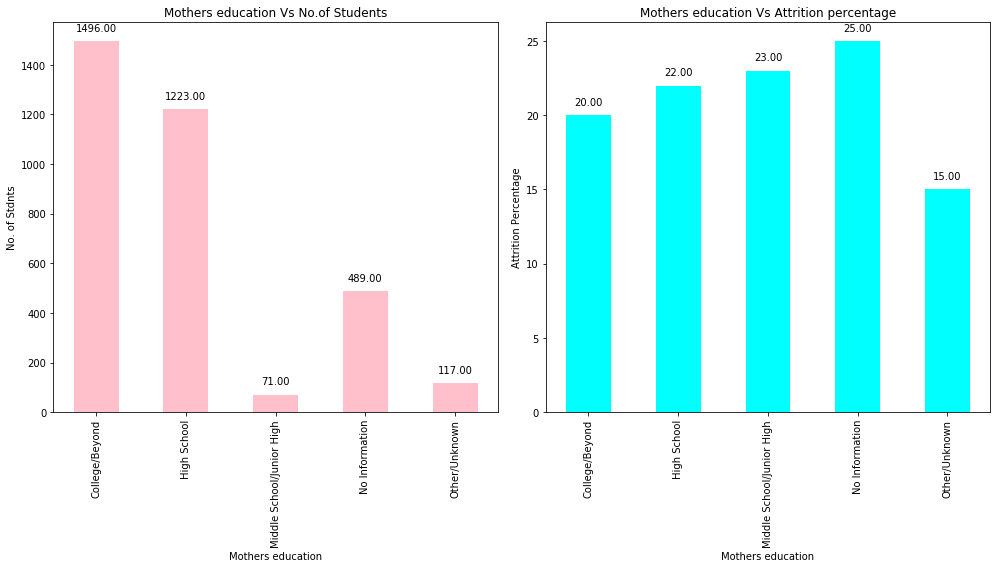

In [69]:
f, axs = plt.subplots(1,2,figsize=(14,8))

plt.subplot(1,2, 1) 

plt.bar(MED['MOTHER_HI_EDU_DESC'],MED['Total no. of students'],width=0.5,color='pink')
plt.title('Mothers education Vs No.of Students')
plt.xlabel('Mothers education')
plt.ylabel('No. of Stdnts')
plt.xticks(rotation=90)

for x,y in zip(MED['MOTHER_HI_EDU_DESC'],MED['Total no. of students']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.subplot(1,2, 2)

plt.bar(MED['MOTHER_HI_EDU_DESC'],MED['Attrition Percentage'],width=0.5,color='cyan')
plt.title('Mothers education Vs Attrition percentage')
plt.xlabel('Mothers education')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=90)

for x,y in zip(MED['MOTHER_HI_EDU_DESC'],MED['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
f.savefig('Mothers education Vs Attrition.jpeg')

Most of the students' mothers have education above high school level. The attrition rates for students of mothers whose education is below high school level are more than the other students.

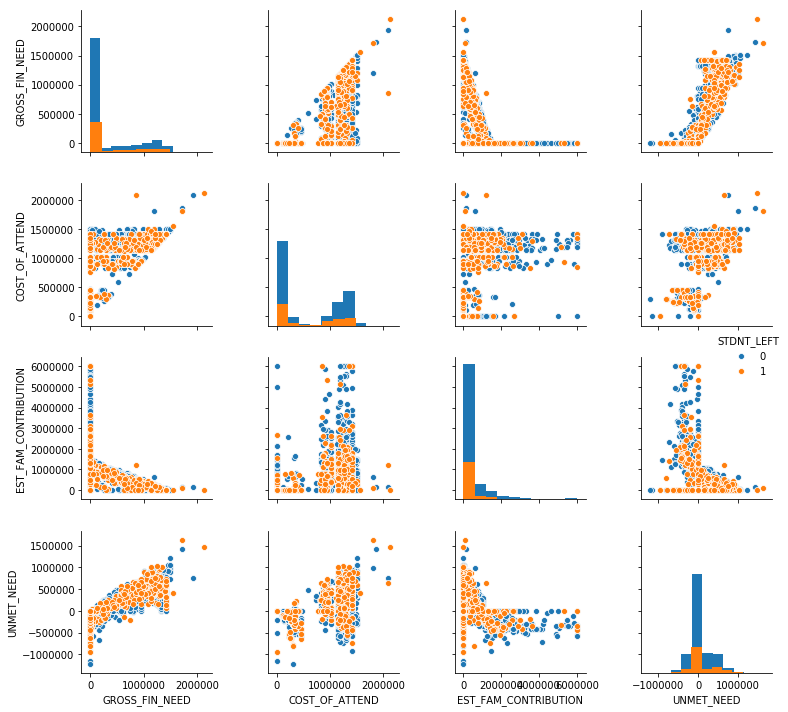

In [70]:
sns.pairplot(att,x_vars=['GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION','UNMET_NEED'],
             y_vars=['GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION','UNMET_NEED'],kind='scatter',diag_kind='hist',
             hue='STDNT_LEFT')
plt.tight_layout()
plt.savefig('Financial variables - Pairplot.jpeg')

Inferences from Pairplots

1. As Gross financial need increases, the unmet need of the student increases. There is no clear difference seen between students who atrite and those who do not.
2. As Gross financial need increases, the estimated family contribution decreases. There is no clear difference seen between students who atrite and those who do not.
3. As the course fees increases, obviously the gross financial need increases. Again, there is no clear difference seen between students who atrite and those who do not.
4. With increase in the course fees, the estimated family contribution is lesser for the students who attrite than for the students who continue the course. So Higher fess and low family contribution can be a reason for attrition.
5. Course fees for most of the courses lie around 1000000. 


#### Co relation plot

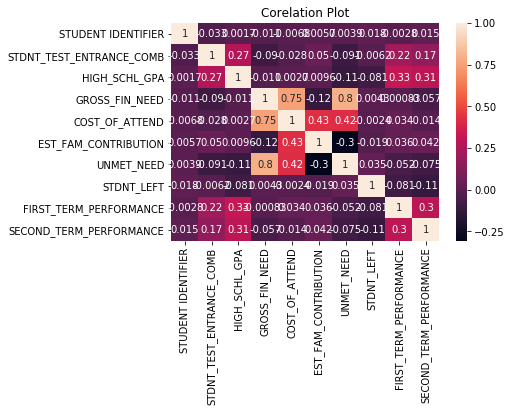

In [71]:
sns.heatmap(att.corr(),annot=True)
plt.title('Corelation Plot')

plt.savefig('Corelation Plot.jpeg')

From the pairplots and the co-relation plot, we can see that there is a strong co-relation between 
Gross financial need & Course fees and Gross financial need & unmet need.
Therefore, dropping variable 'GROSS_FIN_NEED'

In [72]:
att=att.drop('GROSS_FIN_NEED',axis=1)

### Model building

#### Creating dummy variables

In [73]:
att=pd.get_dummies(att)

In [74]:
att.head()

,STUDENT IDENTIFIER,STDNT_TEST_ENTRANCE_COMB,HIGH_SCHL_GPA,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_LEFT,FIRST_TERM_PERFORMANCE,SECOND_TERM_PERFORMANCE,STDNT_AGE_16to18,...,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate
0,7808615,1150.0,4.00,0,0,0.0,1,1.0,1.0,1,...,1,0,0,0,0,1,0,0,1,0
1,7830063,1190.0,2.89,1355760,785760,459300.0,0,1.0,1.0,0,...,0,0,1,0,0,0,0,0,1,0
2,7847538,1030.0,3.39,0,0,0.0,0,1.0,1.0,1,...,0,0,0,0,0,0,1,0,1,0
3,8006429,1220.0,2.93,0,0,0.0,0,1.0,1.0,1,...,0,0,1,0,0,0,0,0,1,0
4,7962680,1190.0,3.86,1355760,519840,278340.0,0,1.0,1.0,1,...,0,0,0,1,0,0,0,0,1,0


Splitting the dependent and independent variables

In [75]:
X=att.drop(['STUDENT IDENTIFIER','STDNT_LEFT'],axis=1)

In [76]:
y=att['STDNT_LEFT']

#### Gradient Boosting Classifier

Splitting data into training and test datasets in 80:20 ratio.

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

Running the model

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=80,random_state=123)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
clf.score(X_test,y_test)

0.8382352941176471

The model predicts the output correctly almost 84% of the times

##### Making a grid search to find the best number of estimators

In [81]:
for w in range(10,300,20):
    clf=GradientBoostingClassifier(n_estimators=w,random_state=123)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    print('For n_estimators = '+str(w))
    print('score is '+str(score))
    print('************************')

For n_estimators = 10
score is 0.8308823529411765
************************
For n_estimators = 30
score is 0.836764705882353
************************
For n_estimators = 50
score is 0.8352941176470589
************************
For n_estimators = 70
score is 0.836764705882353
************************
For n_estimators = 90
score is 0.8382352941176471
************************
For n_estimators = 110
score is 0.8352941176470589
************************
For n_estimators = 130
score is 0.8352941176470589
************************
For n_estimators = 150
score is 0.8352941176470589
************************
For n_estimators = 170
score is 0.8323529411764706
************************
For n_estimators = 190
score is 0.836764705882353
************************
For n_estimators = 210
score is 0.8382352941176471
************************
For n_estimators = 230
score is 0.836764705882353
************************
For n_estimators = 250
score is 0.836764705882353
************************
For n_estimators = 270

The score for 210 estimators seems to be more. Therefore running the model with n_estimators = 210

In [82]:
clf=GradientBoostingClassifier(n_estimators=210,random_state=123)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=210,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [83]:
clf.score(X_test,y_test)

0.8382352941176471

### Model Validation

#### Area Under the Curve and Confusion Matrix

In [84]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print('The AUC for the model :',str(metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('\n')
print('Confusion matrix :','\n',str(metrics.confusion_matrix(y_test,y_pred)))

The AUC for the model : 0.7004100529100528


Confusion matrix : 
 [[524  16]
 [ 94  46]]


#### Plotting the ROC curve

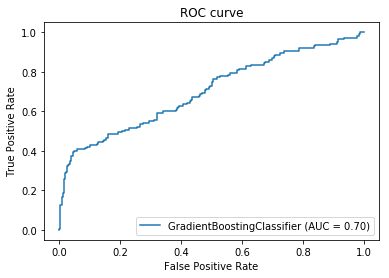

In [85]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf, X_test, y_test)
plt.title('ROC curve')
plt.savefig('ROC Curve.jpeg')
plt.show()

#### Finding the feature importances and finding the facors which affect student attrition the most

In [86]:
imp=clf.feature_importances_

In [87]:
feature_importance=pd.Series(imp,index=X.columns.tolist()).sort_values(ascending=False)
feature_importance

SECOND_TERM_PERFORMANCE                         0.481668
UNMET_NEED                                      0.101552
HIGH_SCHL_GPA                                   0.069009
EST_FAM_CONTRIBUTION                            0.058362
STDNT_TEST_ENTRANCE_COMB                        0.043160
COST_OF_ATTEND                                  0.041718
FIRST_TERM_PERFORMANCE                          0.039473
HOUSING_STS_On Campus                           0.009679
STDNT_BACKGROUND_BGD 1                          0.007811
STDNT_MAJOR_Theatre Arts                        0.007759
STDNT_BACKGROUND_BGD 3                          0.007531
STDNT_MAJOR_Music Performance                   0.007269
STDNT_BACKGROUND_BGD 4                          0.007197
STDNT_MAJOR_Music Education                     0.006610
FATHER_HI_EDU_DESC_Middle School/Junior High    0.006523
STDNT_MAJOR_Biology                             0.006516
HOUSING_STS_Off Campus                          0.006232
STDNT_MAJOR_Criminal Justice   

##### Feature Importances plot

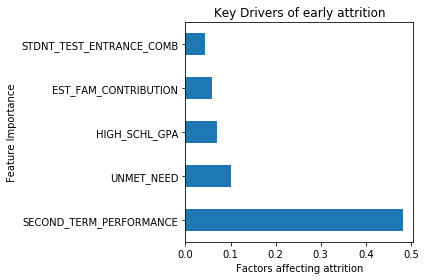

In [88]:
feature_importance.head().plot(kind='barh')
plt.title('Key Drivers of early attrition')
plt.xlabel('Factors affecting attrition')
plt.ylabel('Feature Importance')
plt.tight_layout()
plt.savefig('Key Drivers of early attrition')

### Interpretations and recommended interventions

1. From the model results it is seen that the performance of the students right from the high school to the second term in the university, highly affect the student attrition. The teachers and parents should encourage the students to perform well and provide the required assistance to the students, right from school, so that they do not leave the university withput completing their course.

2. Next to the Student performance, the financial status (unmet need and estimated family contribution) of the students determine their possibilty of attrition. The University might identify student s performing well and provide them with financial assistance in the form of scholarships or sponsors, in collaboration with the government or NGO's if needed.

3. Other inferences from analysing the feature importances are 
    1. The feature importance for the GENDER_F is more than that of GENDER_M, implying that female students are more likely to   attrite.
    2. The feature importance is more when the education background of the parents is 'Middle School/Junior High' than other          education backgrounds.
    
The univesity may identify these students and pay special attention in providing them required assistance.